In [1]:
from google.colab import files
uploaded = files.upload()

Saving Keyword_data - Keyword_data.csv to Keyword_data - Keyword_data.csv


# Task1

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


## Read and clean data

In [3]:
data1 = pd.read_csv('Keyword_data - Keyword_data.csv',na_values = '')

In [4]:
data1

,Title,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
0,Feb/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Meta-Analyses of Financial Performance and Equ...,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN
3,"Home Country Environments, Corporate Diversifi...",DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN
4,Safeguarding Investments in Asymmetric Interor...,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Subsidiary Staffing in Multinational Enterpris...,INTERNATIONAL business enterprises -- Management,FOREIGN subsidiaries -- Management,EMPLOYEE selection,EXECUTIVES -- Recruiting,ORGANIZATIONAL sociology,ORGANIZATIONAL behavior,AGENCY theory,RESOURCE-based theory of the firm,PERSONNEL management,EMPLOYMENT in foreign countries,SUBSIDIARY corporations -- Management,HOST countries (Business)
62,"Strategic Human Resource Practices, Top Manage...",PERSONNEL management,COMPETITIVE advantage,BUSINESS networks,INDUSTRIAL management,STRATEGIC planning,SOCIAL networks,RESOURCE management,RESOURCE-based theory of the firm,HUMAN capital -- Management,INTELLECTUAL capital,DECISION making,INDUSTRIAL efficiency
63,Compensation Policy and Organizational Perform...,COMPENSATION management,ORGANIZATIONAL behavior,PERSONNEL management,HOSPITALS -- Administration,MANAGEMENT,FINANCIAL performance,WAGE payment systems,RESOURCE management,ORGANIZATIONAL effectiveness,INDUSTRIAL efficiency,FINANCIAL management,INDUSTRIAL management
64,"Functional Background Identity, Diversity, and...",CROSS-functional teams,TEAMS in the workplace,GROUP identity,ORGANIZATIONAL behavior,MANAGEMENT,PERFORMANCE,PERSONNEL management,COMPETITIVE advantage,ORGANIZATIONAL effectiveness,GROUP decision making,ORGANIZATIONAL structure,ORGANIZATIONAL sociology


In [5]:
data1 = data1.drop(['Title'],axis = 1).dropna(how = 'all')

data1

,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
2,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN
3,DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN
4,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN
5,EXECUTIVE compensation,WAGES,HUMAN capital,LABOR economics,PERSONNEL management,MANAGEMENT science,CONTINGENCY theory (Management),COMPENSATION management,EXECUTIVE ability (Management),CORPORATE governance,NaN,NaN
6,KNOWLEDGE management,INFORMATION resources management,MANAGEMENT information systems,BREAK-even analysis,DATA mining,MANAGEMENT science,RESEARCH & development,RESEARCH & development contracts,CORPORATE governance,DECISION making,ORGANIZATIONAL behavior,TRANSACTION costs
7,EMOTIONS (Psychology),INTERPERSONAL relations,STRESS (Psychology),SOCIAL interaction,SOCIAL psychology,EMPLOYEES -- Attitudes,CUSTOMER services,CUSTOMER satisfaction,JOB stress,PEER review (Professional performance),NaN,NaN
8,SUPERVISORS,JUSTICE,CONFLICT management,MEDIATION,EMPLOYEES,INDUSTRIAL relations,ORGANIZATIONAL behavior,UNITED States -- National Guard,ORGANIZATIONAL effectiveness,DECISION making,RESOURCE allocation,NaN
9,INDUSTRIAL relations,MANAGEMENT science,DECISION theory,ORGANIZATIONAL sociology,PUNCTUATED equilibrium (Evolution),ORGANIZATIONAL change,ORGANIZATIONAL behavior,ORGANIZATIONAL structure,BUSINESS models,ORGANIZATIONAL research,NaN,NaN
13,DECISION making,EXECUTIVES,INDUSTRIAL management,NEW products,HIGH technology industries,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,CORPORATE governance,INDUSTRIAL management,STOCKHOLDERS wealth,INSTITUTIONAL investors,WAGES,NEW products,ORGANIZATIONAL structure,ORGANIZATIONAL behavior,DECENTRALIZATION in management,ORGANIZATIONAL effectiveness,NaN,NaN


## Adjancy matrix

In [8]:
# find number of unique values
dfv = data1['Keyword 1']
dfv
for i in range(len(data1.columns)):
    dfv = pd.concat([dfv,data1.iloc[:,i]])

dfv.nunique()


248

In [9]:


# matrixs
netm = np.zeros((dfv.nunique(),dfv.nunique()))
netm

# list of unique value
li = list(dfv.dropna().unique())

li.sort()

# adjacency matrix
i = 0
for i in range(len(data1)):
    for j in range(len(data1.columns)):
        for k in range(j+1,len(data1.columns)):
            if (pd.notnull(data1.iloc[i,k])) and (pd.notnull(data1.iloc[i,j])):

                index1 = li.index(data1.iloc[i,j])
                index2 = li.index(data1.iloc[i,k])

                netm[index1][index2] +=1
                netm[index2][index1] +=1


             
netm


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 2., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 2., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Convert matrix to network

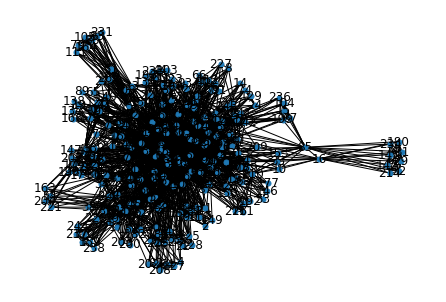

In [10]:
# convert matrix to network
net = nx.from_numpy_matrix(netm)
nx.draw(net, with_labels=True, node_size=25)
plt.show()

## Top 10 nodes by degree

In [11]:
# top 10 by degree
topd=[0]
for i in range(len(net.degree)):
    index = 0
    for k in range(len(topd)):
        
        if net.degree[i]>net.degree[topd[k]]:

            break
        else:
            index+=1
    topd.insert(index,i)
topd[:10]



[154, 157, 135, 169, 47, 162, 161, 220, 99, 28]

In [12]:
topde=[]
for i in range(0,10):
    topde.append(li[topd[i]])

topde

['ORGANIZATIONAL behavior',
 'ORGANIZATIONAL effectiveness',
 'MANAGEMENT science',
 'PERSONNEL management',
 'DECISION making',
 'ORGANIZATIONAL structure',
 'ORGANIZATIONAL sociology',
 'STRATEGIC planning',
 'INDUSTRIAL management',
 'CORPORATE governance']

## Top 10 nodes by strength

In [13]:
# top 10 by strength
weight={}
for i in range(len(netm)):
    key = i
    strength =sum(netm[i])
    weight[i] = sum(netm[i])

weight = dict(sorted(weight.items(), key = lambda x: x[1], reverse=True))
node = weight.keys()
node = list(node)
node[:10]


[154, 157, 135, 169, 47, 162, 161, 28, 99, 220]

In [14]:
topwe=[]
for i in range(0,10):
    topwe.append(li[node[i]])

topwe

['ORGANIZATIONAL behavior',
 'ORGANIZATIONAL effectiveness',
 'MANAGEMENT science',
 'PERSONNEL management',
 'DECISION making',
 'ORGANIZATIONAL structure',
 'ORGANIZATIONAL sociology',
 'CORPORATE governance',
 'INDUSTRIAL management',
 'STRATEGIC planning']

## Top 10 node pairs by weight

In [15]:
# top 10 node pairs by weight
edgew =[]
edge =[]
edgewe = []
for i in range(len(netm)):
    for j in range(len(netm)):
        if net.get_edge_data(i, j, default=0) == 0:
            edge.append(i)
            edge.append(j)
            edgew.append(edge)
            edgew.append(0)
            edgewe.append(edgew)
        else:
            edge.append(i)
            edge.append(j)
            edgew.append(edge)    
            edgew.append(net[i][j]['weight'])
            edgewe.append(edgew)   
        edge = []
        edgew = []


edgewe = sorted(edgewe,key = lambda x: x[1], reverse = True)   
edgewe[:10]   





[[[154, 157], 11.0],
 [[157, 154], 11.0],
 [[154, 162], 9.0],
 [[162, 154], 9.0],
 [[154, 169], 8.0],
 [[169, 154], 8.0],
 [[135, 154], 7.0],
 [[154, 135], 7.0],
 [[28, 154], 6.0],
 [[47, 154], 6.0]]

In [16]:
reedge=[]
reedgef = []
for i in range(0,10):
    reedge.append(li[edgewe[i][0][0]])
    reedge.append(li[edgewe[i][0][1]])
    reedgef.append(reedge)
    reedge=[]

print('Top 10 node pairs by weight are ', reedgef)


Top 10 node pairs by weight are  [['ORGANIZATIONAL behavior', 'ORGANIZATIONAL effectiveness'], ['ORGANIZATIONAL effectiveness', 'ORGANIZATIONAL behavior'], ['ORGANIZATIONAL behavior', 'ORGANIZATIONAL structure'], ['ORGANIZATIONAL structure', 'ORGANIZATIONAL behavior'], ['ORGANIZATIONAL behavior', 'PERSONNEL management'], ['PERSONNEL management', 'ORGANIZATIONAL behavior'], ['MANAGEMENT science', 'ORGANIZATIONAL behavior'], ['ORGANIZATIONAL behavior', 'MANAGEMENT science'], ['CORPORATE governance', 'ORGANIZATIONAL behavior'], ['DECISION making', 'ORGANIZATIONAL behavior']]


## plot

In [34]:
# plot
weightlist =weight.values()
weightlist = list(weightlist)
nodelist = weight.keys()
nodelist = list(nodelist)


In [35]:
# merge node's degree and strength data
df = pd.DataFrame()
df['node'] = nodelist
df['strength'] = weightlist
dfd = pd.DataFrame()
degreelist2 = []
for i in range(len(topd)):
    degreelist2.append(net.degree(topd[i]))
dfd['node'] = topd
dfd['degree'] = degreelist2
dff = dfd.merge(df, how = 'left')
# calculate average strength by degree
dfm = dff.groupby('degree')['strength'].mean()
dfm = pd.DataFrame(dfm)
dfm = dfm.reset_index()
dfm

,degree,strength
0,4,4.000000
1,7,7.000000
2,8,8.000000
3,9,9.000000
4,10,10.000000
5,11,11.000000
6,14,14.500000
7,15,16.000000
8,16,18.200000
9,17,18.153846


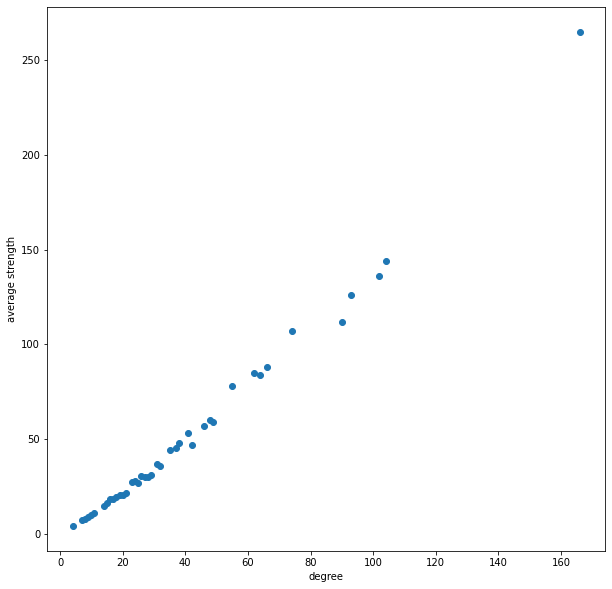

In [36]:
fig = plt.figure(figsize = (10,10))
ax = plt.subplot(111)

ax.scatter(dfm.degree,dfm.strength)
ax.set_xlabel('degree')
ax.set_ylabel('average strength')
plt.show()
